In [140]:
import numpy as np
import quandl
import pandas as pd
from scipy import stats
from scipy.stats import linregress
from pandas_datareader import data as pdr
from sklearn.linear_model import LinearRegression 
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import statsmodels.api as sm
import seaborn as sns
import pyfolio as pf
%matplotlib inline
# silence warnings
import warnings
warnings.filterwarnings('ignore')
import fix_yahoo_finance as yf
yf.pdr_override()

In [141]:
# Pull NIFTY data from Yahoo finance 
#NIFTY = yf.download('^NSEI', start='2012-6-1', end='2016-6-1')

In [142]:
# download Panel
#data = pdr.get_data_yahoo("SPY", start="2017-01-01", end="2017-04-30")
data = pdr.get_data_yahoo(["BTCUSD=X","^IXIC","^DJI","^FTSE","^GDAXI","VTI","^N225","MUB","TIP","BND","TLT","IEF","ISTB","VEU","VSS","VWO","VNQ","VNQI","DBC","GLD","UCO"], start="2014-01-01", end="2019-02-22")

[*********************100%***********************]  21 of 21 downloaded


In [143]:
#data.tail()

In [144]:
Asset_Class_Adj_Close = data['Adj Close']

In [145]:
Asset_Class_Returns = (Asset_Class_Adj_Close / Asset_Class_Adj_Close.shift(1)) - 1
Asset_Class_Annual_Returns = Asset_Class_Returns.mean() * 250
Asset_Class_Volatility = Asset_Class_Returns.std() * np.sqrt(250)

In [146]:
Asset_Class_Cov_Matrix = Asset_Class_Returns.cov() * 250
Asset_Class_Cov_Matrix

,BND,BTCUSD=X,DBC,GLD,IEF,ISTB,MUB,TIP,TLT,UCO,...,VNQ,VNQI,VSS,VTI,VWO,^DJI,^FTSE,^GDAXI,^IXIC,^N225
BND,0.000941,0.001059,-0.000305,0.001621,0.001480,0.000293,0.000550,0.001105,0.003227,-0.002348,...,0.000852,-0.000155,-0.000386,-0.000899,-0.000358,-0.000967,-0.000433,-0.000918,-0.000938,-0.000382
BTCUSD=X,0.001059,3.063160,-0.003336,-0.007261,0.001330,0.000524,0.001556,0.002861,0.002534,-0.005470,...,-0.001010,-0.002337,-0.000589,0.001793,0.000568,0.003882,-0.001296,0.000548,0.002148,-0.005657
DBC,-0.000305,-0.003336,0.021658,0.004041,-0.001039,0.000087,-0.000562,0.000579,-0.002785,0.085638,...,0.002921,0.007351,0.009231,0.006500,0.011294,0.006283,0.005813,0.005004,0.006042,0.002798
GLD,0.001621,-0.007261,0.004041,0.017012,0.002829,0.000674,0.001041,0.002229,0.005265,0.005527,...,0.000852,0.000271,0.000636,-0.002687,0.000112,-0.002965,-0.002432,-0.005398,-0.003095,-0.003231
IEF,0.001480,0.001330,-0.001039,0.002829,0.002631,0.000486,0.000964,0.001866,0.005544,-0.006197,...,0.000777,-0.001118,-0.001609,-0.002429,-0.001901,-0.002499,-0.001473,-0.002552,-0.002619,-0.000987
ISTB,0.000293,0.000524,0.000087,0.000674,0.000486,0.000268,0.000178,0.000355,0.000911,-0.000137,...,0.000355,0.000096,0.000015,-0.000229,0.000060,-0.000262,-0.000079,-0.000320,-0.000238,-0.000120
MUB,0.000550,0.001556,-0.000562,0.001041,0.000964,0.000178,0.000763,0.000693,0.002100,-0.002699,...,0.000419,-0.000279,-0.000559,-0.000795,-0.000615,-0.000827,-0.000506,-0.000953,-0.000806,-0.000622
TIP,0.001105,0.002861,0.000579,0.002229,0.001866,0.000355,0.000693,0.001887,0.004006,0.001293,...,0.001070,0.000095,-0.000150,-0.000977,-0.000108,-0.001143,-0.000295,-0.001014,-0.001058,-0.000048
TLT,0.003227,0.002534,-0.002785,0.005265,0.005544,0.000911,0.002100,0.004006,0.013654,-0.015820,...,0.001594,-0.002708,-0.003841,-0.005138,-0.004498,-0.005367,-0.003187,-0.005315,-0.005399,-0.001188
UCO,-0.002348,-0.005470,0.085638,0.005527,-0.006197,-0.000137,-0.002699,0.001293,-0.015820,0.420793,...,0.011565,0.028374,0.036683,0.028647,0.045221,0.027670,0.024840,0.021694,0.026329,0.009013


In [147]:
Asset_Class_Corr_Matrix = Asset_Class_Returns.corr() 

In [148]:
Asset_Class_Corr_Matrix.to_excel('C:\Users\AJ\Documents\Asset_Class_Corr_Matrix-No-Index.xlsx')

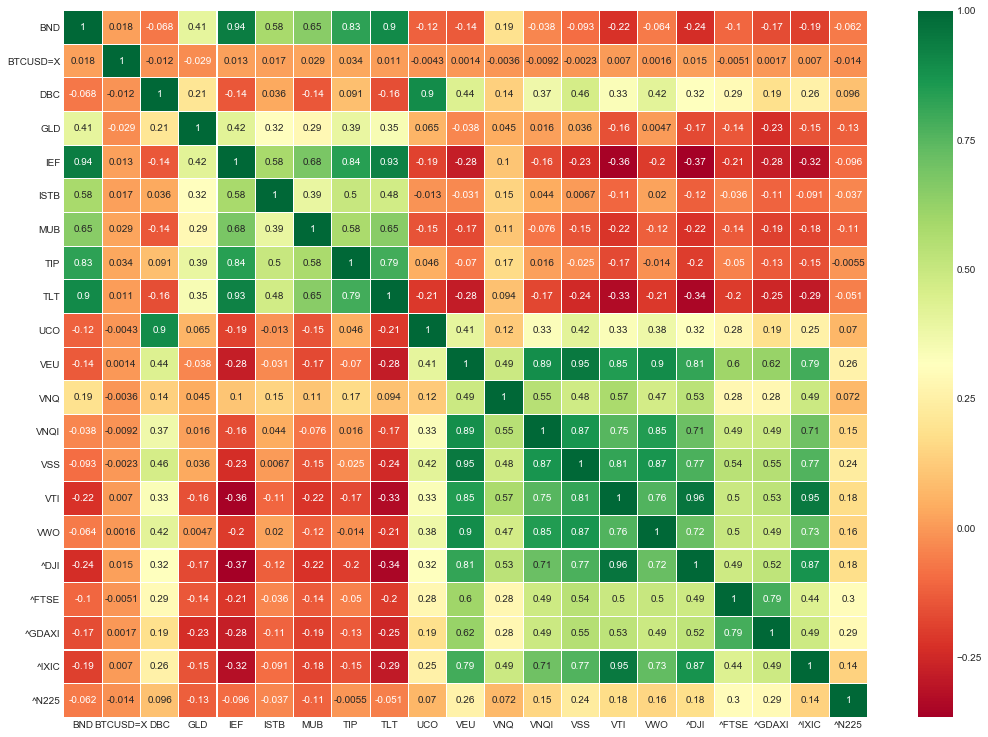

In [149]:
fig, ax = plt.subplots(figsize=(18,13))
sns.heatmap(Asset_Class_Corr_Matrix, annot=True, linewidths=.1, cmap="RdYlGn")

In [150]:
Asset_Class_Annualized_Volatility = Asset_Class_Returns.std() * 250 **.4

In [151]:
Asset_Class_Annualized_Return = Asset_Class_Returns.mean() * 250

In [152]:
Asset_Class_Annualized_Cov = Asset_Class_Returns.cov() * 250

In [153]:
benchmark = pdr.get_data_yahoo(["^GSPC"], start="2014-01-01", end="2019-02-22")
Benchmark_Adj_Close = benchmark['Adj Close']
benchmark_rets = (Benchmark_Adj_Close / Benchmark_Adj_Close.shift(1)) - 1
benchmark_volatility = benchmark_rets.std() * np.sqrt(250)

[*********************100%***********************]  1 of 1 downloaded


In [154]:
port_return = []
port_volatility = []
sharpe_ratio = []
information_ratio = []
m2_ratio = []
Asset_weights = []

In [155]:
selected = ["BTCUSD=X","^IXIC","^DJI","^FTSE","^GDAXI","VTI","^N225","MUB","TIP","BND","TLT","IEF","ISTB","VEU","VSS","VWO","VNQ","VNQI","DBC","GLD","UCO"]
ticker = selected
num_assets = len(selected)
num_portfolios = 50000
np.random.seed(101)

In [156]:
for single_portfolio in range(num_portfolios):
    days = 250
    rf = 0.026
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    returns = np.dot(weights, Asset_Class_Annualized_Return)
    volatility = np.sqrt(np.dot(weights.T, np.dot(Asset_Class_Annualized_Cov, weights)))
    sharpe = (returns - rf) / volatility
    return_difference = returns - benchmark_rets.mean() * 250 
    info = return_difference.mean() / volatility
    m2ratio = (sharpe * benchmark_volatility) + rf
    information_ratio.append(info)
    m2_ratio.append(m2ratio)
    sharpe_ratio.append(sharpe)
    port_return.append(returns)
    port_volatility.append(volatility)
    Asset_weights.append(weights)

In [157]:
 portfolio = {'Returns': port_return,
             'Volatility': port_volatility,
             'Sharpe Ratio': sharpe_ratio,
             'Information Ratio': information_ratio,
             'M2 Ratio': m2_ratio}

In [158]:
for counter,symbol in enumerate(selected):
    portfolio[symbol+' Weight'] = [Weight[counter] for Weight in Asset_weights]

In [159]:
df = pd.DataFrame(portfolio)

In [160]:
column_order = ['Returns', 'Volatility', 'Sharpe Ratio', 'Information Ratio', 'M2 Ratio'] + [stock+' Weight' for stock in selected]

In [161]:
df = df[column_order]

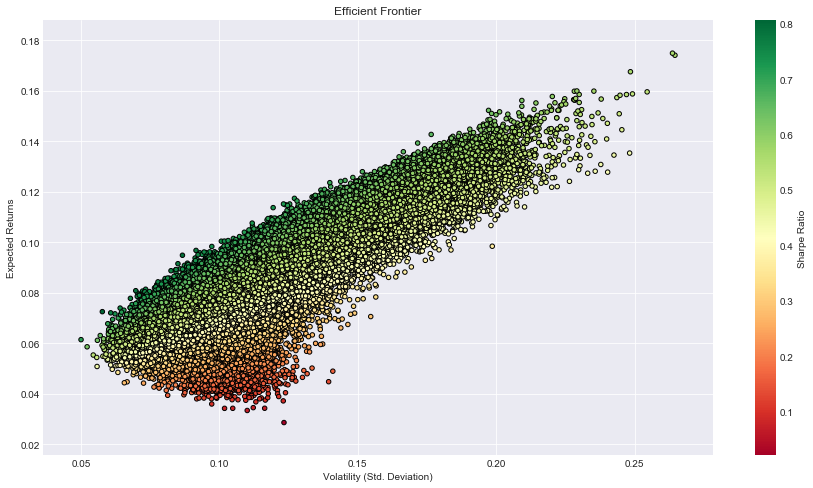

In [162]:
fig, ax = plt.subplots()
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio', cmap='RdYlGn', edgecolors='black', figsize=(15,8), grid=True, ax=ax)
plt.title('Efficient Frontier')
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.style.use('seaborn-dark')
plt.show()

In [163]:
# find min Volatility & max sharpe values in the dataframe (df)
min_volatility = df['Volatility'].min()
max_sharpe = df['Sharpe Ratio'].max()
max_info = df['Information Ratio'].max()

In [164]:
# use the min, max values to locate and create the two special portfolios
sharpe_portfolio = df.loc[df['Sharpe Ratio'] == max_sharpe]
min_variance_port = df.loc[df['Volatility'] == min_volatility]
max_information_ratio_port = df.loc[df['Information Ratio'] == max_info]

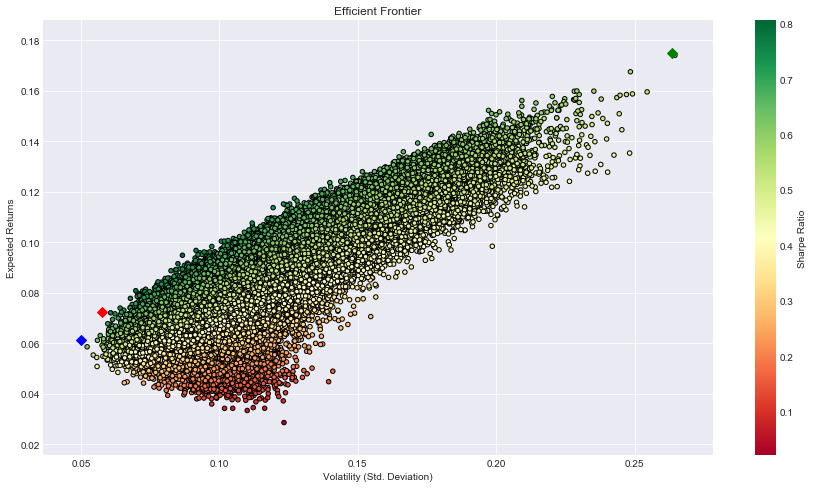

In [165]:
fig, ax = plt.subplots()
plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio', cmap='RdYlGn', edgecolors='black', figsize=(15,8), grid=True, ax=ax);
plt.scatter(x=sharpe_portfolio['Volatility'], y=sharpe_portfolio['Returns'], c='red', marker='D', s=50)
plt.scatter(x=min_variance_port['Volatility'], y=min_variance_port['Returns'], c='blue', marker='D', s=50 )
plt.scatter(x=max_information_ratio_port['Volatility'], y=max_information_ratio_port['Returns'], c='green', marker='D', s=50 )
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

In [166]:
print(max_information_ratio_port.T)

                      44779
Returns            0.174979
Volatility         0.263652
Sharpe Ratio       0.565058
Information Ratio  0.321131
M2 Ratio           0.100842
BTCUSD=X Weight    0.064065
^IXIC Weight       0.146648
^DJI Weight        0.007905
^FTSE Weight       0.105369
^GDAXI Weight      0.039449
VTI Weight         0.019667
^N225 Weight       0.000338
MUB Weight         0.033520
TIP Weight         0.135271
BND Weight         0.026103
TLT Weight         0.068056
IEF Weight         0.042397
ISTB Weight        0.016939
VEU Weight         0.036579
VSS Weight         0.100955
VWO Weight         0.044199
VNQ Weight         0.009434
VNQI Weight        0.054808
DBC Weight         0.042606
GLD Weight         0.004217
UCO Weight         0.001474


In [167]:
max_IR_weights = np.array([0.064065,0.146648,0.007905,0.105369,0.039449,0.019667,0.000338,0.033520,0.135271,0.026103,0.068056,0.042397,0.016939,0.036579,0.100955,0.044199,0.009434,0.054808,0.042606,0.004217,0.001474])

In [168]:
Port_Cash_Balance = 2500
max_information_ratio_cash_allocations = max_IR_weights * Port_Cash_Balance
max_information_ratio_cash_allocations

array([160.1625, 366.62  ,  19.7625, 263.4225,  98.6225,  49.1675,
         0.845 ,  83.8   , 338.1775,  65.2575, 170.14  , 105.9925,
        42.3475,  91.4475, 252.3875, 110.4975,  23.585 , 137.02  ,
       106.515 ,  10.5425,   3.685 ])

In [169]:
max_information_ratio_cash_allocations.sum()

2499.9975

In [170]:
# Calculate the weighted stock returns
Weighted_Returns = Asset_Class_Returns.mul(max_IR_weights, axis=1)

In [171]:
# Calculate the portfolio returns
Asset_Class_Returns['Portfolio'] = Weighted_Returns.sum(axis=1)

In [172]:
AssetClass_rets = Asset_Class_Returns['Portfolio']

Start date,2014-01-02
End date,2019-02-22
Total months,61
,Backtest
Annual return,14.6%
Cumulative returns,101.0%
Annual volatility,25.1%
Sharpe ratio,0.64
Calmar ratio,0.64
Stability,0.84
Max drawdown,-22.8%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,22.85,2018-01-05,2018-12-14,NaT,NaN
1,17.95,2014-01-15,2014-02-20,2014-02-26,31
2,14.31,2014-07-22,2015-01-14,2015-10-30,334
3,8.04,2015-11-03,2016-01-19,2016-04-12,116
4,6.03,2014-03-04,2014-04-09,2014-05-29,63


IndexError: invalid index

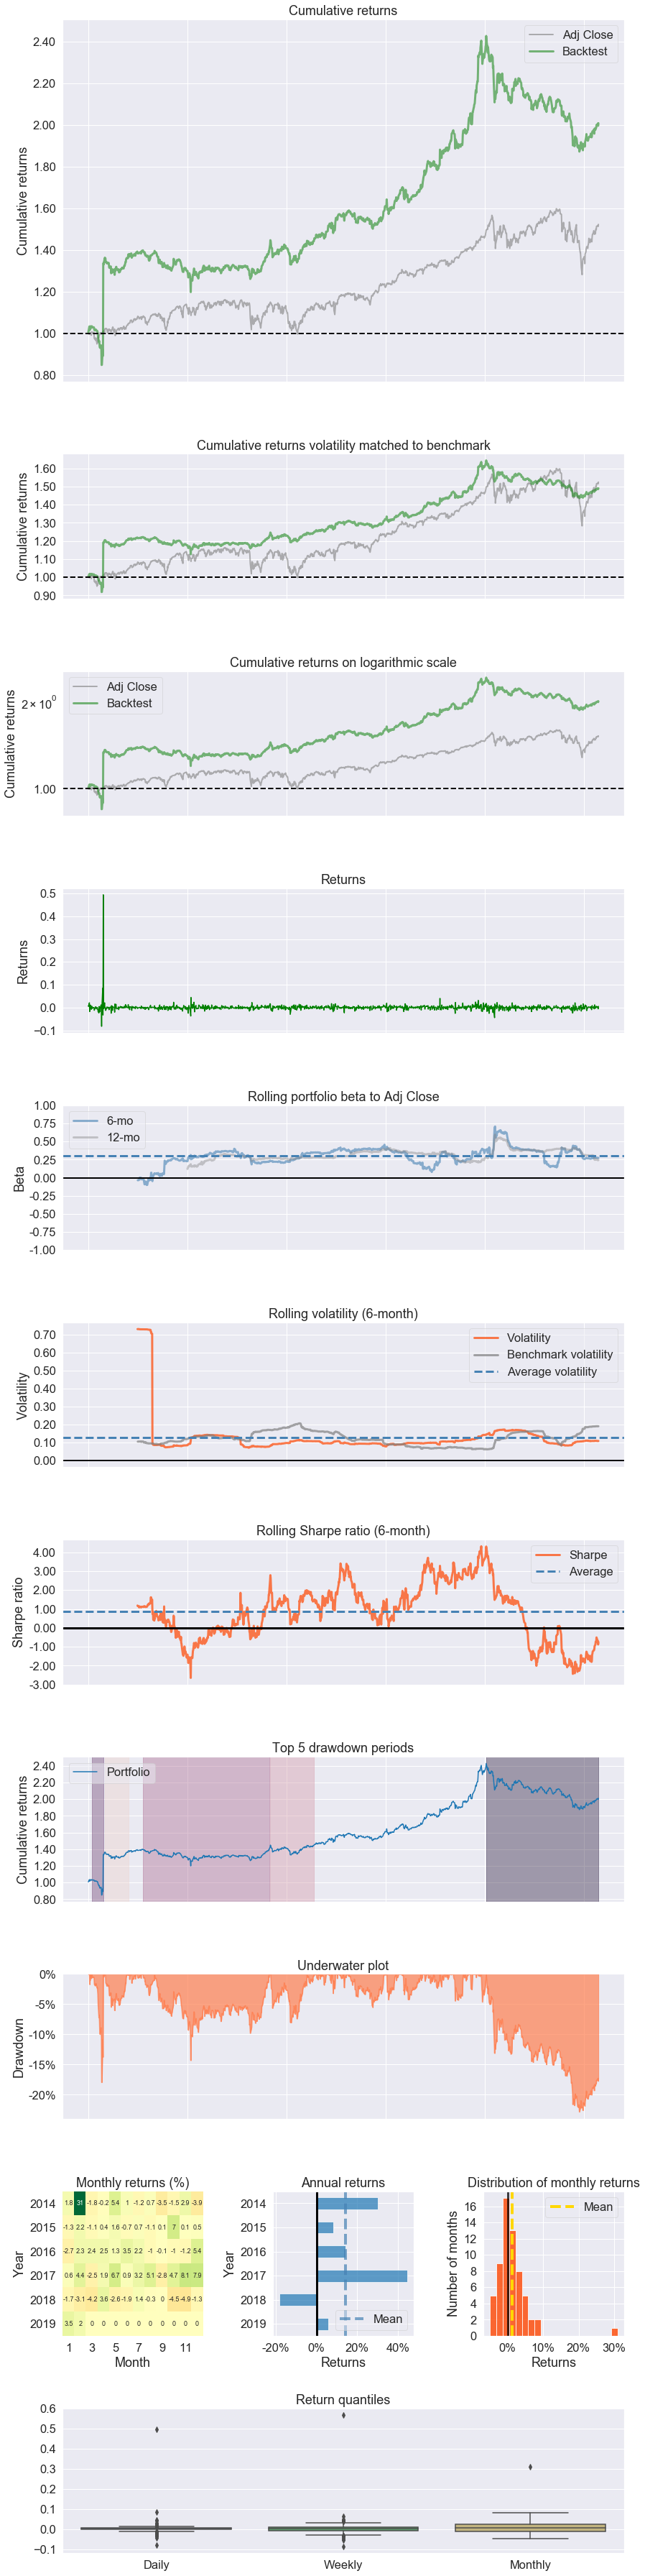

In [173]:
pf.create_returns_tear_sheet(AssetClass_rets, benchmark_rets=benchmark_rets)

In [174]:
print(sharpe_portfolio.T)

                      39242
Returns            0.072558
Volatility         0.057733
Sharpe Ratio       0.806428
Information Ratio -0.307524
M2 Ratio           0.132812
BTCUSD=X Weight    0.100864
^IXIC Weight       0.013653
^DJI Weight        0.006132
^FTSE Weight       0.065907
^GDAXI Weight      0.078385
VTI Weight         0.021856
^N225 Weight       0.103723
MUB Weight         0.087583
TIP Weight         0.086631
BND Weight         0.004114
TLT Weight         0.014310
IEF Weight         0.027206
ISTB Weight        0.040688
VEU Weight         0.083805
VSS Weight         0.029640
VWO Weight         0.015006
VNQ Weight         0.035210
VNQI Weight        0.015417
DBC Weight         0.007425
GLD Weight         0.085908
UCO Weight         0.076537


In [175]:
#max_sharpe_weights = np.array([0.064065,0.146648,0.007905,0.105369,0.039449,0.019667,0.000338,0.033520,0.135271,0.026103,0.068056,0.042397,0.016939,0.036579,0.100955,0.044199,0.009434,0.054808,0.042606,0.004217,0.001474])

In [176]:
#Port_Cash_Balance = 2500
#max_information_ratio_cash_allocations = max_IR_weights * Port_Cash_Balance
#max_information_ratio_cash_allocations

In [177]:
#max_information_ratio_cash_allocations.sum()

In [178]:
print(min_variance_port.T)

                      15355
Returns            0.061470
Volatility         0.050044
Sharpe Ratio       0.708783
Information Ratio -0.576334
M2 Ratio           0.119879
BTCUSD=X Weight    0.074082
^IXIC Weight       0.009106
^DJI Weight        0.062256
^FTSE Weight       0.092512
^GDAXI Weight      0.083205
VTI Weight         0.058677
^N225 Weight       0.114432
MUB Weight         0.060487
TIP Weight         0.113006
BND Weight         0.001419
TLT Weight         0.057777
IEF Weight         0.013716
ISTB Weight        0.000530
VEU Weight         0.020046
VSS Weight         0.072571
VWO Weight         0.001240
VNQ Weight         0.006455
VNQI Weight        0.011171
DBC Weight         0.064399
GLD Weight         0.052952
UCO Weight         0.029962


In [179]:
#min_variance_weights = np.array([0.064065,0.146648,0.007905,0.105369,0.039449,0.019667,0.000338,0.033520,0.135271,0.026103,0.068056,0.042397,0.016939,0.036579,0.100955,0.044199,0.009434,0.054808,0.042606,0.004217,0.001474])